In [1]:
cd ../src

/home/sankha/Documents/programs/ML/densityNN/src


In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from lib.density.utils import divergences, OptimizeNormalKL
from scipy.stats import multivariate_normal, norm

# KL Divergence

This notebook is going to explore the KL divergence ...

For discrete distributions, the K-L divergence is defined by the following formula

\begin{align*}
D_{KL} = \sum_{x \in \chi} {P(x) \log {\frac {P(x)} {q(x)}}  }
\end{align*}

For continuous variables, this is represented by the integral.


In [3]:
mu = np.array([1, 2])
cov = np.array([
    [1, 0.5],
    [0.5, 2]
])

normal1 = multivariate_normal(mean=mu, cov=cov)
data = np.linspace(-10, 10, 100).reshape((-1, 2))
normal1.pdf(data)

array([7.65144615e-33, 1.22794054e-30, 1.63525271e-28, 1.80703327e-26,
       1.65699480e-24, 1.26081067e-22, 7.96071967e-21, 4.17088789e-19,
       1.81333662e-17, 6.54187250e-16, 1.95839120e-14, 4.86486229e-13,
       1.00280244e-11, 1.71527573e-10, 2.43459223e-09, 2.86742621e-08,
       2.80241209e-07, 2.27271760e-06, 1.52944083e-05, 8.54070293e-05,
       3.95756704e-04, 1.52172674e-03, 4.85533048e-03, 1.28550760e-02,
       2.82425709e-02, 5.14881795e-02, 7.78905150e-02, 9.77766927e-02,
       1.01849720e-01, 8.80355467e-02, 6.31436991e-02, 3.75816380e-02,
       1.85607328e-02, 7.60655938e-03, 2.58675401e-03, 7.29954402e-04,
       1.70926760e-04, 3.32122363e-05, 5.35500533e-06, 7.16465733e-07,
       7.95434951e-08, 7.32803685e-09, 5.60201605e-10, 3.55365107e-11,
       1.87059145e-12, 8.17065429e-14, 2.96147763e-15, 8.90704826e-17,
       2.22296633e-18, 4.60368597e-20])

## Examples of getting distributions over here ...

First, a 1D case ...

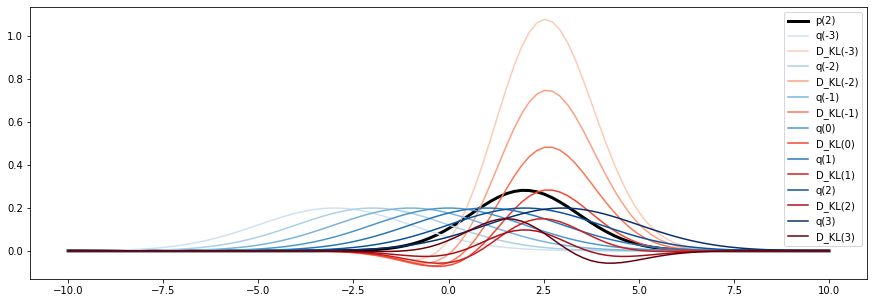

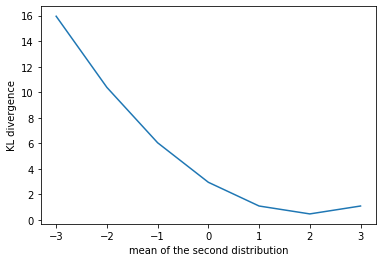

In [4]:
theta = np.linspace(-10, 10, 100).reshape((-1, 1))
mu_1  = np.array([2]).reshape((1,-1))
sigma_1 = np.array([2]).reshape((1,-1))
mu_2  = np.array([-3]).reshape((1,-1))
sigma_2 = np.array([4]).reshape((1,-1))

plt.figure(figsize=(15, 5))
prob_1 = multivariate_normal.pdf(theta, mean=mu_1, cov=sigma_1)
plt.plot(theta.flatten(), prob_1, label='p(2)', color='black', lw=3 )

divs = []
ms = np.array([-3, -2, -1, 0, 1, 2, 3])
colorScale = (ms - ms.min())/( ms.max() - ms.min() )
colorScale = 0.2 + 0.8*colorScale
for i, m in enumerate(ms):
    mu_2  = np.array([m]).reshape((1,-1))
    prob_2 = multivariate_normal.pdf(theta, mean=mu_2, cov=sigma_2)

    div, div_all = divergences.D_KL(prob_1, prob_2, returnVals=True)
    divs.append( div )

    plt.plot(theta.flatten(), prob_2,  color= plt.cm.Blues( colorScale[i] ) , label=f'q({m})' )
    plt.plot(theta.flatten(), div_all, color= plt.cm.Reds( colorScale[i] ), label=f'D_KL({m})' )
    
plt.legend()

plt.figure()
plt.plot(ms, divs)
plt.xlabel('mean of the second distribution')
plt.ylabel('KL divergence')

plt.show()
plt.close()

# Optimization

Now that we see how the KL divergence decreases with the convergence between the two probability functions, is it possible to create an optimizer that will provide a Gaussian function that minimized the distance between *any* given function and the returned Gaussian function? The answer is, of course. This will be explored in the next section ...

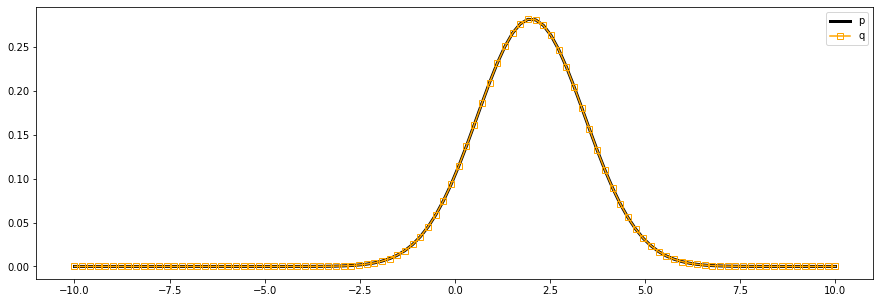

In [5]:
theta = np.linspace(-10, 10, 100).reshape((-1, 1))
mu_1  = np.array([2]).reshape((1,-1))
sigma_1 = np.array([2]).reshape((1,-1))
prob_1 = multivariate_normal.pdf(theta, mean=mu_1, cov=sigma_1)

mu0 = np.array([-1]).reshape((1, -1))
optKL = OptimizeNormalKL.OptimizeNormalKL(prob_1, theta)
q_optimized = optKL.optimize(mu0)


plt.figure(figsize=(15, 5))
plt.plot(theta.flatten(), prob_1, color='black', lw=3, label='p' )
plt.plot( theta.flatten(), q_optimized, 's-', color='orange', mfc='None', mec='orange',  label='q') 
plt.legend()
plt.show()
plt.close('all')

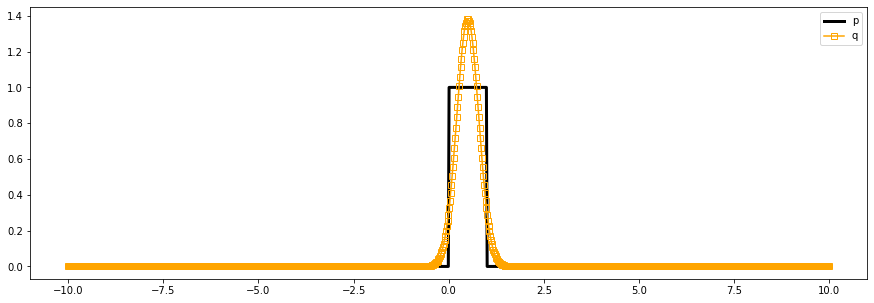

In [8]:
theta = np.linspace(-10, 10, 1000).reshape((-1, 1))

prob_1 = np.where( (theta>=0) & (theta<=1) , 1, 0).flatten()

mu0 = np.array([-1]).reshape((1, -1))
sigma_0 = np.array([2]).reshape((1,-1))

optKL = OptimizeNormalKL.OptimizeNormalKL(prob_1, theta)
q_optimized = optKL.optimize(mu0)

plt.figure(figsize=(15, 5))
plt.plot(theta.flatten(), prob_1, color='black', lw=3, label='p' )
plt.plot( theta.flatten(), q_optimized, 's-', color='orange', mfc='None', mec='orange',  label='q') 
plt.legend()
plt.show()
plt.close('all')

Now for the 2D case:

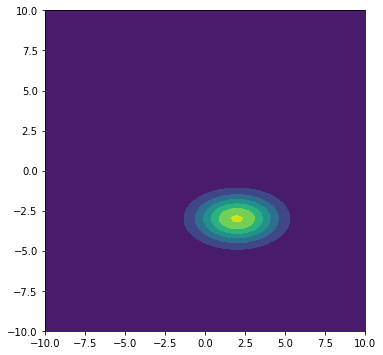

0.9800985925765558


In [7]:
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
theta = np.array(list(zip(X.flatten(), Y.flatten())))

mu    = np.array([2, -3])
sigma = np.array([
    [3, 0],
    [0, 1]
])

prob = multivariate_normal.pdf( theta, mu, sigma )
prob = prob.reshape(100, 100)

plt.figure(figsize=(5,5))
plt.axes([0.1, 0.1, 0.89, 0.89])
plt.contourf(X, Y, prob)
plt.show()
plt.close('all')

print( prob.sum() * (20/100)**2 )